In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("average_monthly_nominal_wage_2000_2016.csv", encoding='cp1251', sep=';')
df2 = pd.read_csv("average_monthly_nominal_wage_2017_2023.csv", encoding='cp1251', sep=';')

In [3]:
df1.sample(5)

,Деятельность,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2,Рыболовство и рыбоводство,2846,3839,5031,5445,7085,10234,12311,14797,19499,22914,23782,25940,29201,32437,37062,46676,54927
9,"Целлюлозно-бумажное производство, издательская...",2737,4309,5480,6848,7892,9419,10924,13792,17632,17707,20104,23710,26312,28505,29222,30148,32399
24,"Операции с недвижимым имуществом, аренда и пре...",2457,3546,4677,6196,7795,10237,12763,16642,21275,22610,25623,28239,30926,33846,37559,39815,43737
12,Производство резиновых и пластмассовых изделий,2140,3032,3957,4951,5957,6879,8768,11083,13464,13851,15766,17713,19758,21599,23270,25006,27565
20,"Оптовая и розничная торговля, ремонт автотранс...",1585,2295,3069,3974,4906,6552,8235,11476,14927,15959,18406,19613,21634,23168,25601,26947,30030


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Деятельность  29 non-null     object
 1   2000          29 non-null     int64 
 2   2001          29 non-null     int64 
 3   2002          29 non-null     int64 
 4   2003          29 non-null     int64 
 5   2004          29 non-null     int64 
 6   2005          29 non-null     int64 
 7   2006          29 non-null     int64 
 8   2007          29 non-null     int64 
 9   2008          29 non-null     int64 
 10  2009          29 non-null     int64 
 11  2010          29 non-null     int64 
 12  2011          29 non-null     int64 
 13  2012          29 non-null     int64 
 14  2013          29 non-null     int64 
 15  2014          29 non-null     int64 
 16  2015          29 non-null     int64 
 17  2016          29 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 4.2+ KB


In [5]:
df2.sample(5)

,Деятельность,2017,2018,2019,2020,2021,2022,2023
14,Производство бумаги и бумажных изделий,39631,42755,47513,52275,57976,66540,73402
32,"Водоснабжение, водоотведение, организация сбор...",29097,31586,34518,36347,40039,46075,52185
46,"Деятельность в области культуры, спорта, орган...",38200,44439,46990,48445,53340,57491,64929
17,Производство химических веществ и химических п...,45894,49159,54332,57339,63702,75283,87531
23,"Производство компьютеров, электронных и оптиче...",46928,51492,53982,56672,64614,74835,91219


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Деятельность  47 non-null     object
 1   2017          47 non-null     int64 
 2   2018          47 non-null     int64 
 3   2019          47 non-null     int64 
 4   2020          47 non-null     int64 
 5   2021          47 non-null     int64 
 6   2022          47 non-null     int64 
 7   2023          47 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.1+ KB


Проанализируем динамику уровня средних зарплат в разрезе по видам экономической деятельности за последние 30 лет в России. Сначала посмотрим во сколько раз увеличилась средняя зарплата во всех экономических сферах.

In [7]:
def plt_salary_growth(df, years):
    ratio = [df.iloc[i,-1] / df.iloc[i, 1] for i in range(df.shape[0])]
    plt.figure(figsize = (10, 5))
    plt.bar(df.index, ratio, color='c')
    plt.ylabel(f'Во сколько раз увеличилась зарплата за {years}')
    plt.xlabel('Экономические деятельности')

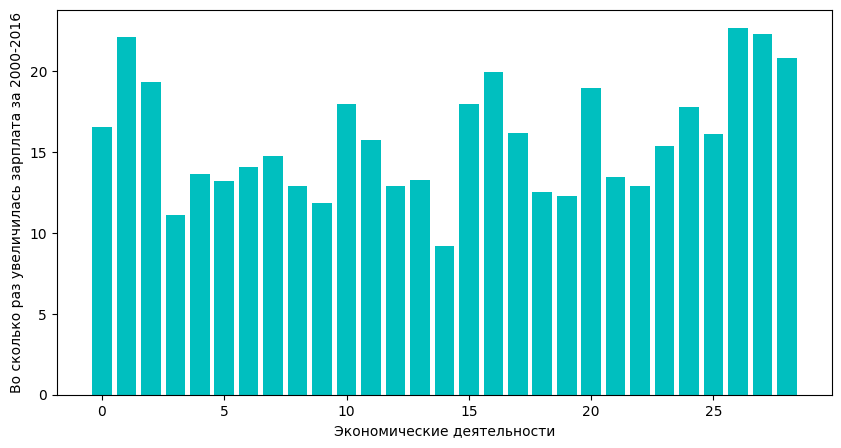

In [8]:
plt_salary_growth(df1, '2000-2016')

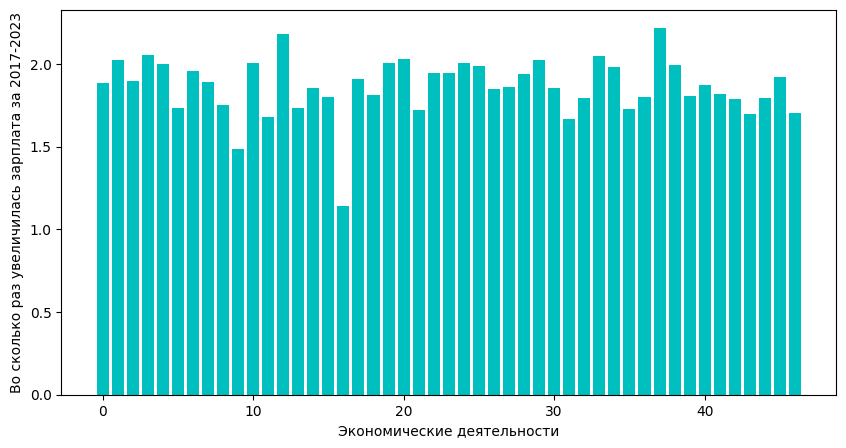

In [9]:
plt_salary_growth(df2,  '2017-2023')

Для удобства анализа за весь период оставим только те экономические деятельности, названия которых полностью совпадают в обоих датасетах.

In [10]:
df = df1.merge(df2, how='inner', on='Деятельность')
economic_sectors = df['Деятельность']
df.set_index('Деятельность', inplace=True)
years = list(map(int, df.columns))
df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Деятельность,,,,,,,,,,,,,,,,,,,,,
Всего по экономике,2223,3240,4360,5499,6740,8555,10634,13593,17290,18638,...,32495,34030,36709,39167,43724,47867,51344,57244,65338,73709
Рыболовство и рыбоводство,2846,3839,5031,5445,7085,10234,12311,14797,19499,22914,...,37062,46676,54927,68032,75766,88604,94983,101547,121726,139520
Производство кокса и нефтепродуктов,4916,7012,9625,11879,13729,19397,22320,28565,34913,37964,...,75517,81605,88194,95957,87591,81685,82106,87214,97720,109541
Производство резиновых и пластмассовых изделий,2140,3032,3957,4951,5957,6879,8768,11083,13464,13851,...,23270,25006,27565,30622,33581,35623,39662,44817,51471,61423
Строительство,2640,3859,4807,6177,7305,9043,10869,14333,18574,18122,...,29354,29960,32332,33678,38518,42630,44738,51944,60850,68944
Образование,1240,1833,2927,3387,4203,5430,6983,8778,11317,13294,...,25862,26928,28088,30258,34361,37072,39563,43391,48400,54263


In [11]:
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2667.500000,3802.500000,5117.833333,6223.000000,7503.166667,9923.000000,11980.833333,15191.500000,19176.166667,20797.166667,...,37260.000000,40700.833333,44635.833333,49619.000000,52256.833333,55580.166667,58732.666667,64359.500000,74250.833333,84566.666667
std,1233.042051,1737.493683,2329.819943,2925.159551,3250.824167,4938.667958,5391.811325,6932.692284,8319.467805,9116.429222,...,19362.240666,21469.688944,23591.037005,26778.136335,23374.330531,23409.726110,23841.178307,24214.048011,29157.848195,33043.862756
min,1240.000000,1833.000000,2927.000000,3387.000000,4203.000000,5430.000000,6983.000000,8778.000000,11317.000000,13294.000000,...,23270.000000,25006.000000,27565.000000,30258.000000,33581.000000,35623.000000,39563.000000,43391.000000,48400.000000,54263.000000
25%,2160.750000,3084.000000,4057.750000,5074.500000,6152.750000,7298.000000,9234.500000,11710.500000,14420.500000,14918.750000,...,26735.000000,27686.000000,29149.000000,31386.000000,35400.250000,38461.500000,40931.000000,46598.750000,53815.750000,63303.250000
50%,2431.500000,3539.500000,4583.500000,5472.000000,6912.500000,8799.000000,10751.500000,13963.000000,17932.000000,18380.000000,...,30924.500000,31995.000000,34520.500000,36422.500000,41121.000000,45248.500000,48041.000000,54594.000000,63094.000000,71326.500000
75%,2794.500000,3854.000000,4975.000000,6007.500000,7250.000000,9936.250000,11950.500000,14681.000000,19267.750000,21845.000000,...,35920.250000,43514.500000,50372.500000,60815.750000,67755.500000,73230.500000,74415.500000,79721.500000,89624.500000,100583.000000
max,4916.000000,7012.000000,9625.000000,11879.000000,13729.000000,19397.000000,22320.000000,28565.000000,34913.000000,37964.000000,...,75517.000000,81605.000000,88194.000000,95957.000000,87591.000000,88604.000000,94983.000000,101547.000000,121726.000000,139520.000000


Построим графики изменения зарплаты по годам для выбранных видов экономической деятельности.

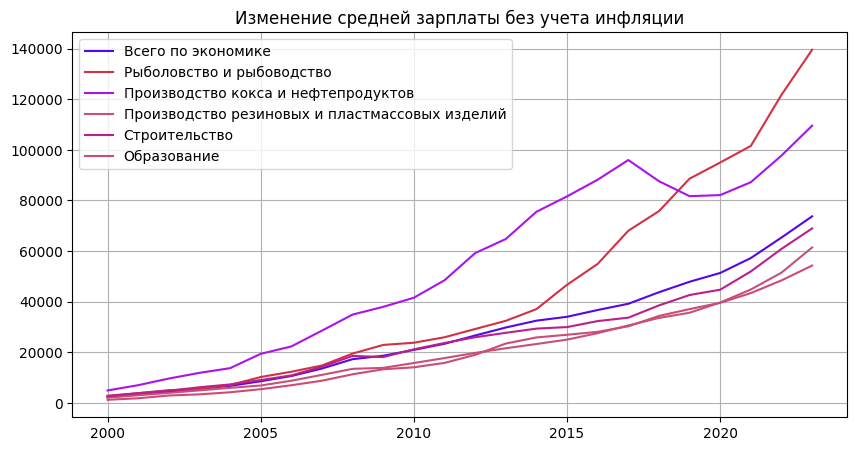

In [12]:
def plot_sector_part(df, sector, years):
    col = (np.random.random (), np.random.random (), np.random.random ())
    nominal_salary = df[df.index == sector].values[0]
    plt.plot(years, nominal_salary, color=col)


plt.figure(figsize=(10, 5))
for sector in economic_sectors:
    plot_sector_part(df, sector, years)
plt.title('Изменение средней зарплаты без учета инфляции')
plt.legend(economic_sectors)
plt.grid(True)
plt.show()

Можно отметить, что несмотря на общий тренд роста, зарплаты в сфере рыболовства сильно растут после 2014 года.
Также можно выделить резкий скачок вниз зарплат в сфере производства нефтепродуктов в 2018 году.

 Учтем инфляцию для подсчета реальной динамики зарплат и пересчитаем средние зарплаты с учетом уровня инфляции.

In [13]:
inflation = pd.read_csv("Inflation_rate.csv")
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Год     34 non-null     int64  
 1   Янв     33 non-null     float64
 2   Фев     33 non-null     float64
 3   Мар     32 non-null     float64
 4   Апр     32 non-null     float64
 5   Май     32 non-null     float64
 6   Июн     32 non-null     float64
 7   Июл     32 non-null     float64
 8   Авг     32 non-null     float64
 9   Сен     32 non-null     float64
 10  Окт     32 non-null     float64
 11  Ноя     32 non-null     float64
 12  Дек     33 non-null     float64
 13  Всего   34 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 3.8 KB


In [14]:
inflation.set_index('Год', inplace=True)
inflation = inflation.iloc[24::-1]
inflation.head()

,Янв,Фев,Мар,Апр,Май,Июн,Июл,Авг,Сен,Окт,Ноя,Дек,Всего
Год,,,,,,,,,,,,,
2000,28.93,25.11,22.49,19.95,19.40,20.15,18.94,18.73,18.54,19.41,19.75,20.20,20.20
2001,20.71,22.19,23.67,24.77,24.81,23.68,22.05,20.88,20.02,18.82,18.63,18.58,18.58
2002,18.96,17.66,16.76,16.04,15.94,14.69,15.00,15.09,14.86,14.84,15.12,15.06,15.06
2003,14.29,14.82,14.78,14.62,13.62,13.93,13.91,13.35,13.28,13.20,12.48,11.99,11.99
2004,11.28,10.58,10.25,10.22,10.15,10.13,10.36,11.28,11.38,11.53,11.70,11.74,11.74


In [15]:
inflation_temps = inflation['Всего'].values

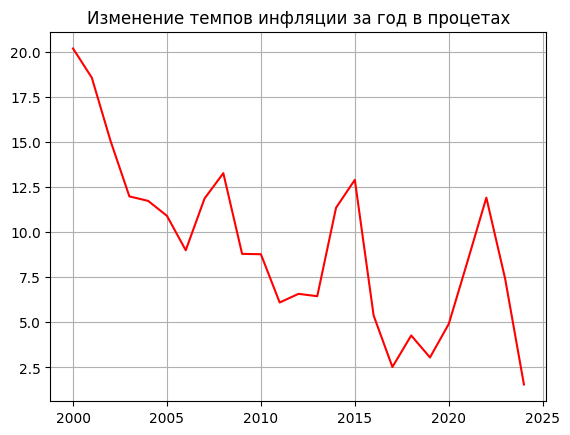

In [16]:
plt.plot(inflation.index, inflation_temps, color = 'Red')
plt.title('Изменение темпов инфляции за год в процетах')
plt.grid(True)
plt.show()

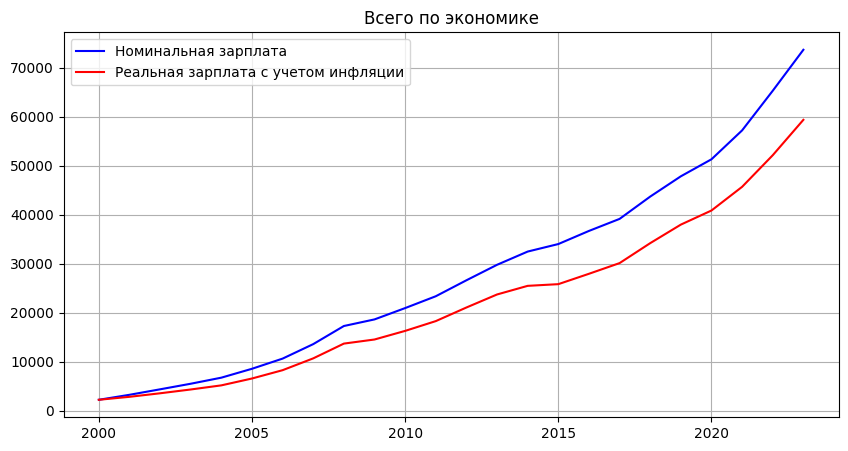

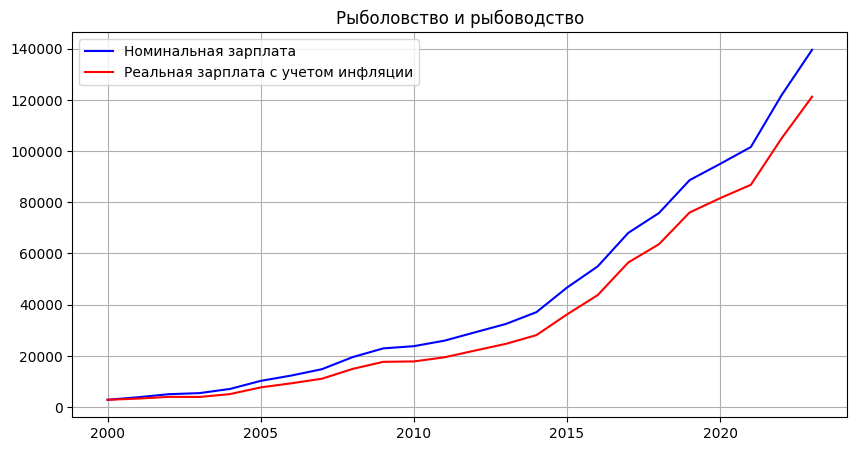

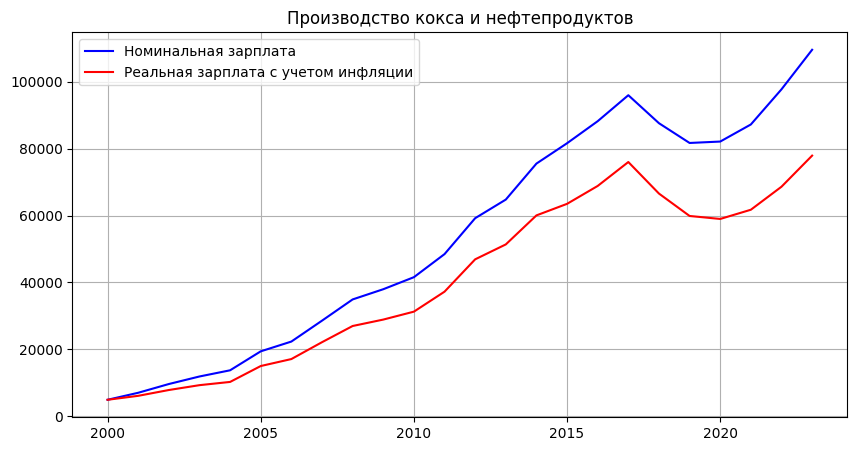

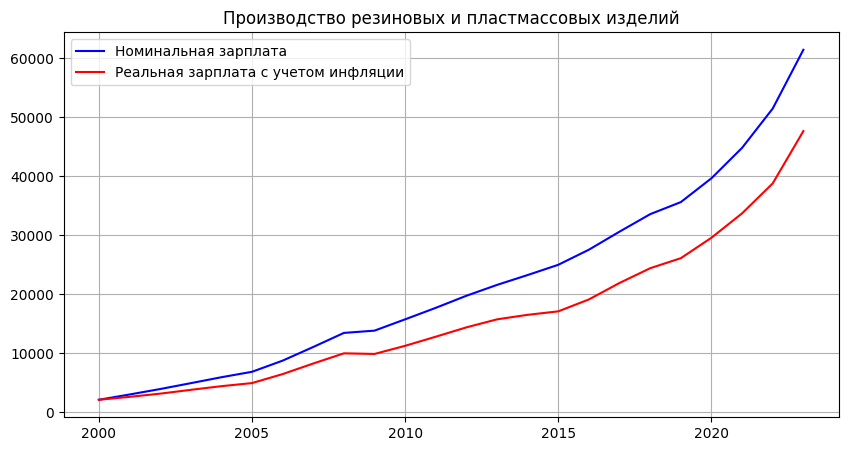

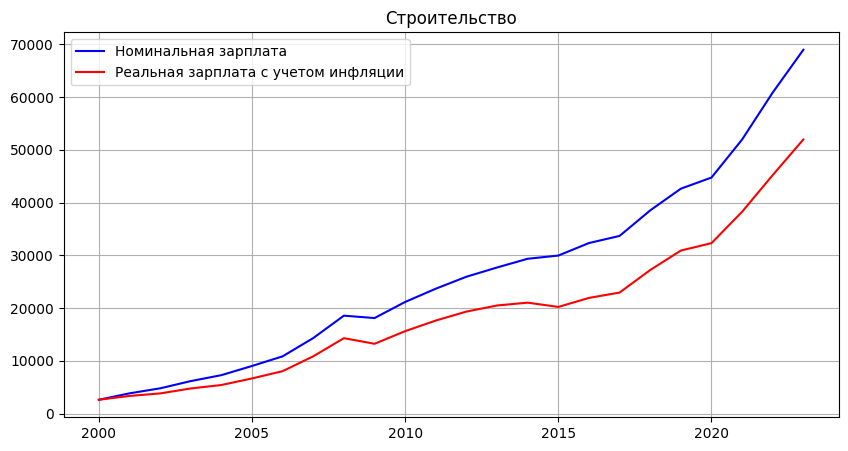

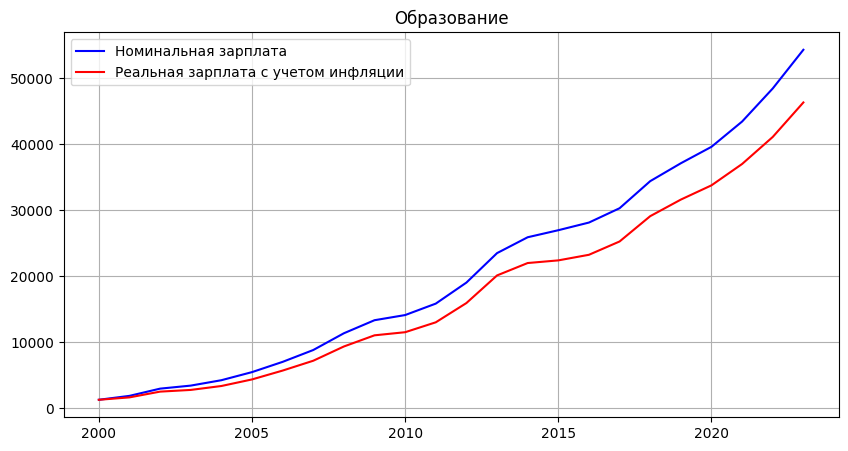

In [17]:
def plot_sector_salary(df, sector, inflation_temps, years):
    nominal_salary = df[df.index == sector].values[0]
    n = len(nominal_salary)

    inflation_salary = [nominal_salary[0]] * n
    for i in range(1, n):
        inflation_salary[i] = inflation_salary[i - 1] * (1 + inflation_temps[i] / 100)

    real_salary = [nominal_salary[i] - (inflation_salary[i] - nominal_salary[0]) for i in range(n)]

    plt.figure(figsize=(10, 5))
    plt.plot(years, nominal_salary, color='blue')
    plt.plot(years, real_salary, color='red')
    plt.title(sector)
    plt.legend(['Номинальная зарплата', 'Реальная зарплата с учетом инфляции'])
    plt.grid(True)
    plt.show()


for sector in economic_sectors:
    plot_sector_salary(df, sector, inflation_temps, years)

Проанализируем влияние инфляции на изменение зарплаты по сравнению с предыдущим годом. Для этого можно поделить зарплату на коэффициент инфляции и выяснить реальную зарплату без учёта обесценивания денег, и сравнить эту реальную зарплату с прошлогодней.

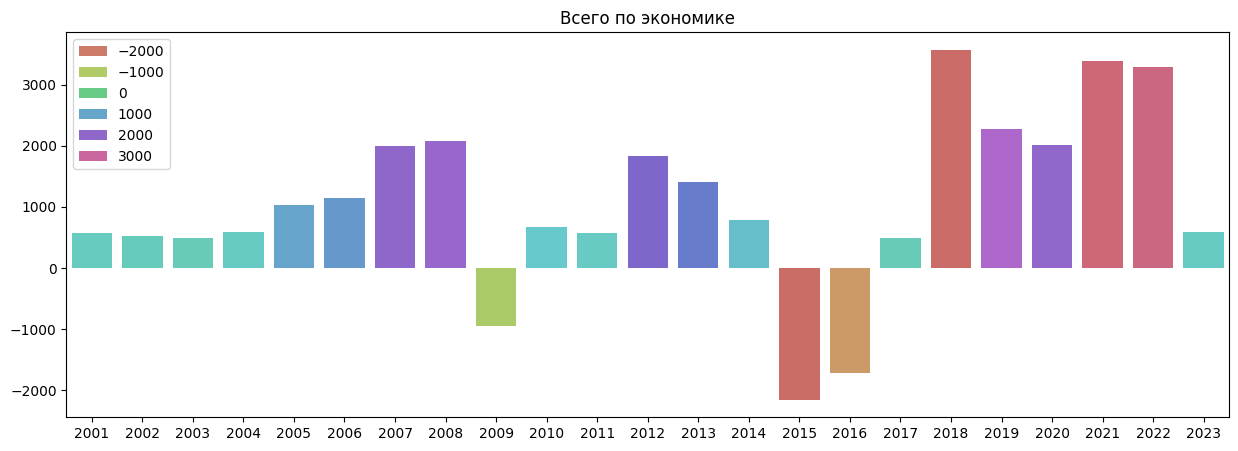

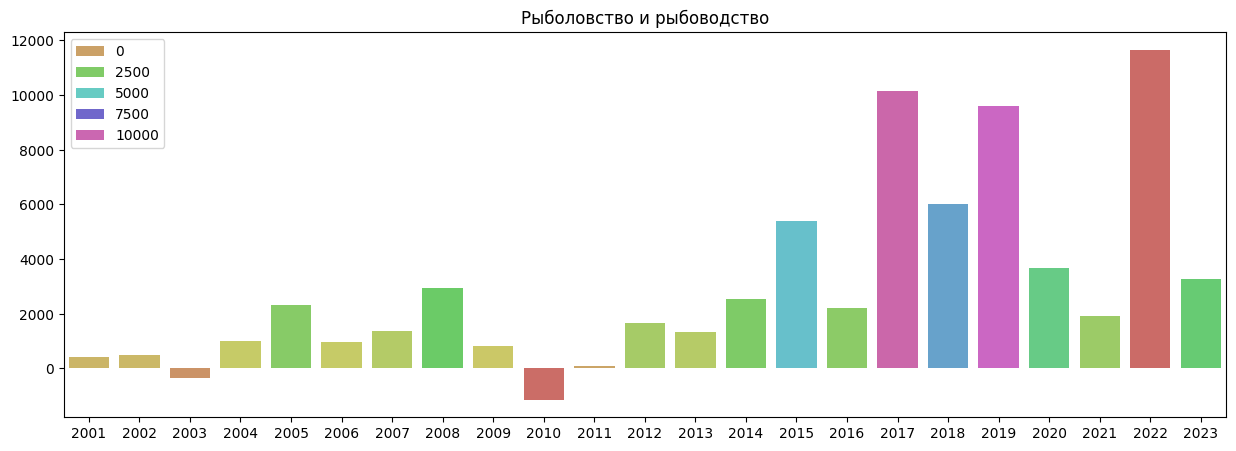

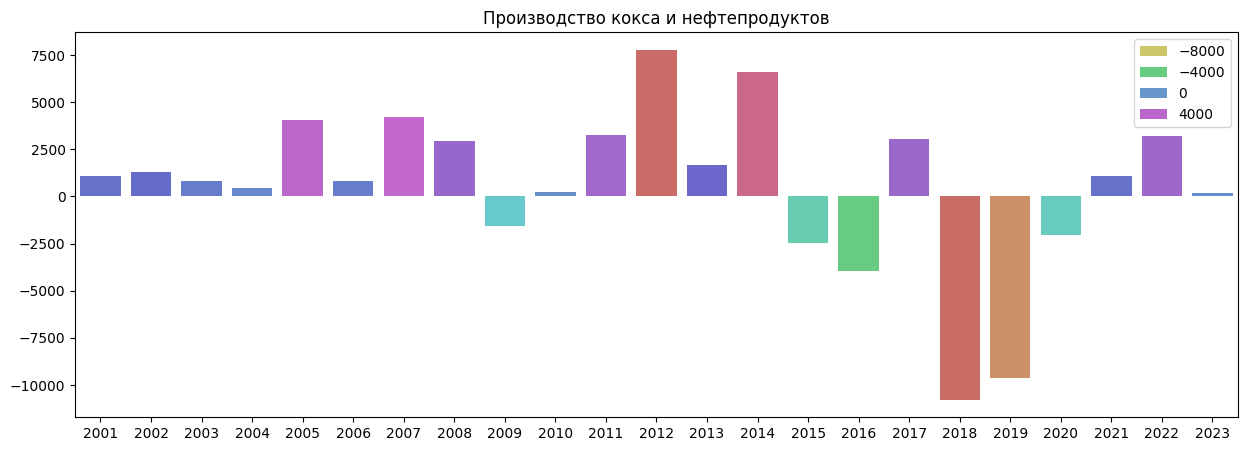

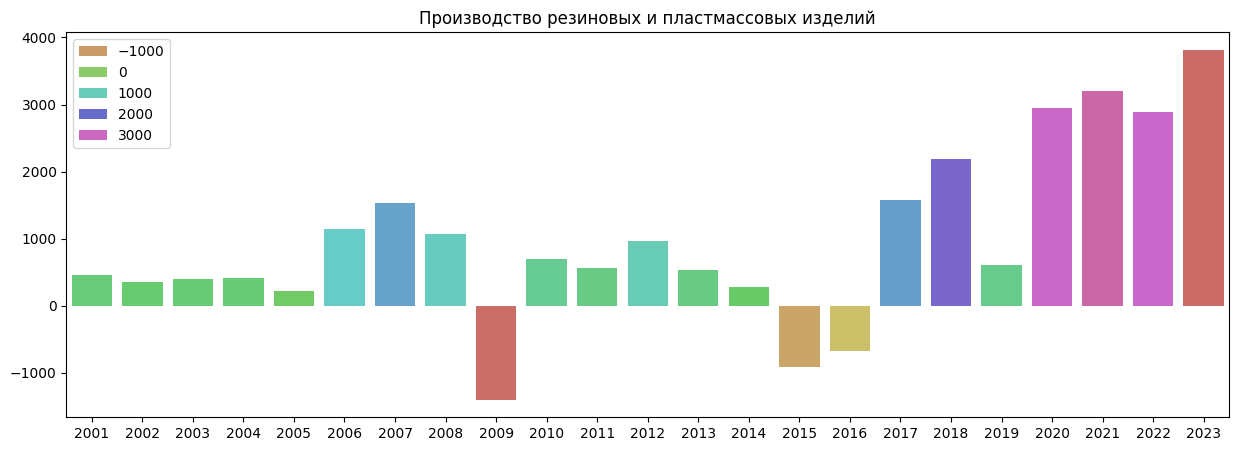

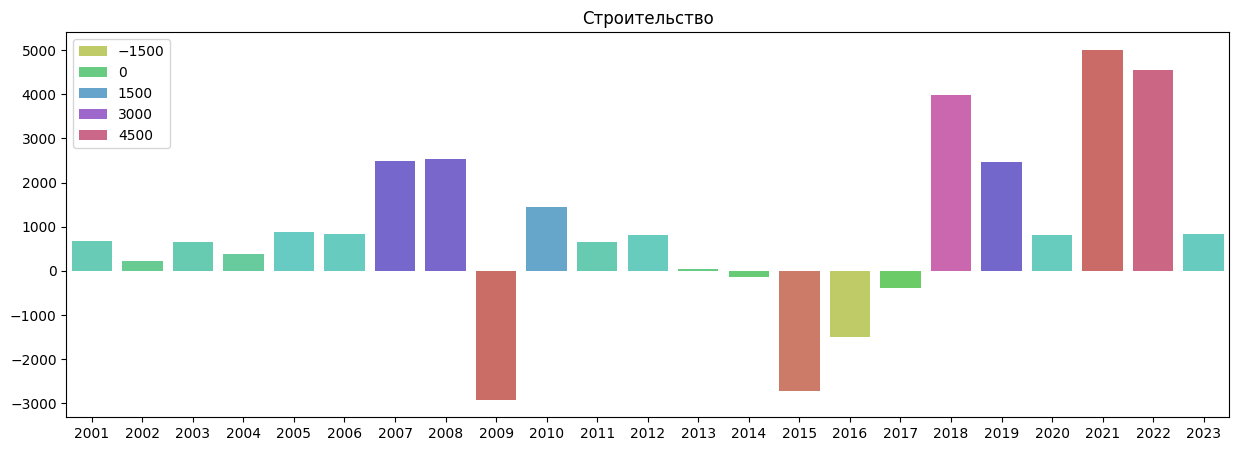

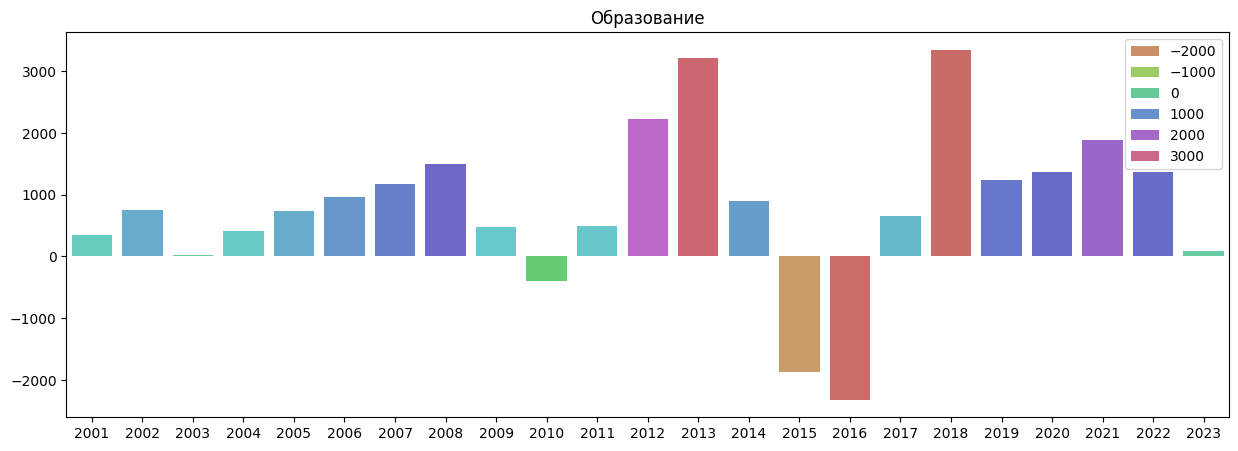

In [18]:
def plot_real_salary_change(df, sector, inflation_temps, years):
    nominal_salary = df[df.index == sector].values[0]
    n = len(nominal_salary)
    comparison = [nominal_salary[i] - nominal_salary[i - 1] * (1 + inflation_temps[i - 1] / 100) for i in range(1, n)]

    plt.figure(figsize= (15, 5))
    sns.barplot(x=years[1:], y=comparison, hue=comparison, palette='hls')
    plt.title(sector)
    plt.show()


for sector in economic_sectors:
    plot_real_salary_change(df, sector, inflation_temps, years)

Для всех видов экономической деятельности заметно падение зарплат после кризисных годов (2008 и 2014).
Также здесь более ярко выражено падение средней зарплаты в сфере производства нефтепродуктов, и заметно, что зарплаты рыбаков растут быстрее, чем средняя зарплата по России, несмотря на кризисы.